### This notebook contains the solution to the task from this exercise on perceptual decision making.

stimulus start: 150. ms, stimulus end: 0.5 s
simulating 426 neurons. Start: Thu Jun  5 21:08:15 2025
sim end: Thu Jun  5 21:09:11 2025


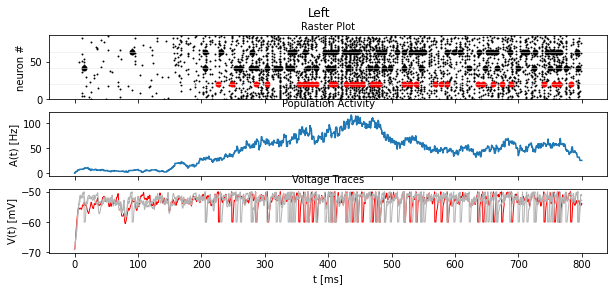

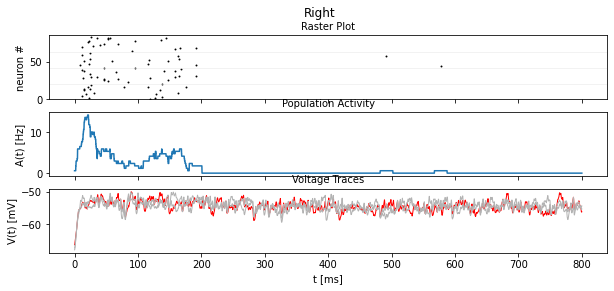

In [69]:
%matplotlib inline
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt

import numpy as np

decision_making.getting_started()

### 11.1.1. Question: External poisson population

The network shown in the figure above is implemented in Brian2 in the function competing_populations.decision_making.sim_decision_making_network(). Each subpopulation is a Brian2 NeuronGroup. Look at the source code of the function sim_decision_making_network() to answer the following questions:

Q11.1.1.1 For each of the four subpopulations, find the variable name of the corresponding NeuronGroup.

Answer: It's interesting that the network implements exactly four NeuronGroups: \
inhib_pop – the inhibitory population \
excit_pop_A – the excitatory population receiving the left stimulus \
excit_pop_B – the excitatory population receiving the right stimulus \
excit_pop_Z – the excitatory population that does not receive any stimulus


Q11.1.1.2 Each NeuronGroup is monitored with a PopulationRateMonitor, a SpikeMonitor, and a StateMonitor. Find the variable names for those monitors. Have a look at the Brian2 documentation if you are not familiar with the concept of monitors. \
Answer: sim_decision_making_network returns results. It's a dictionary containing all monitors. The variable names follow a consistent pattern, such as spike_monitor_A, rate_monitor_inhib, etc.


Q11.1.1.3 Which state variable of the neurons is recorded by the StateMonitor? \
Answer: The membrane voltage is recorded. This makes sense, as the model is a rate-based one, unlike Compte’s spiking working memory model.

### 12.1.2. Question: Accessing a dictionary to plot the population rates

The monitors are returned in a Python dictionary providing access to objects by name. Read the Python documentation and look at the code block below or the function competing_populations.decision_making.getting_started() to learn how dictionaries are used.

Extend the following code block to include plots for all four subpopulations. \
Q12.1.2.1 Run the simulation for 800ms. What are the “typical” population rates of the four populations towards the end of the simulation? (In case the network did not decide, run the simulation again). \
Answer: The activity of the left excitatory population drops to zero, while the activity of the right excitatory population increases—this reflects the stronger stimulus on the right. The excitatory population that receives no input also shows a decrease in activity. Interestingly, the activity of the inhibitory population remains constant throughout the simulation.

simulating 480 neurons. Start: Thu Jun  5 18:48:01 2025
sim end: Thu Jun  5 18:48:47 2025


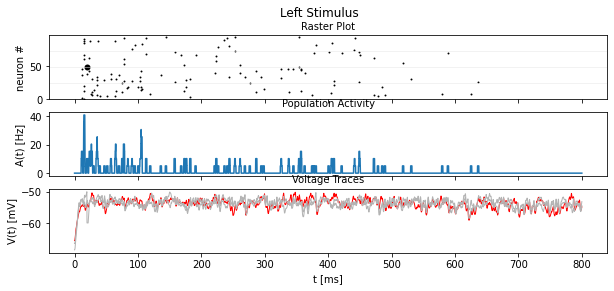

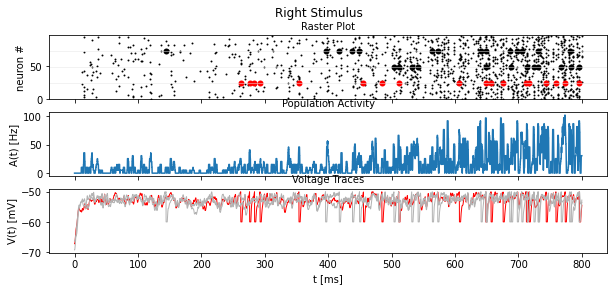

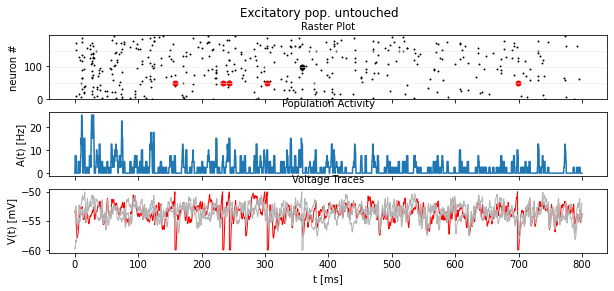

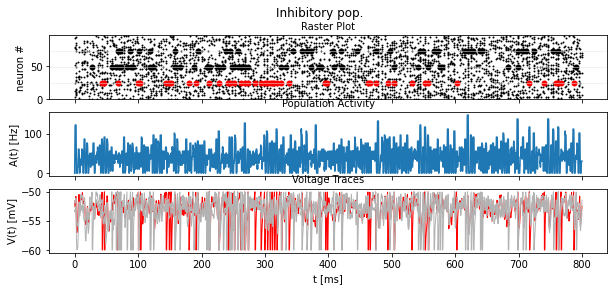

In [7]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.6, max_sim_time=800. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Excitatory pop. untouched")
plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Inhibitory pop.")
plt.show()

Q12.1.2.2 Without running the simulation again, but by using the same results dictionary, plot the rates using different values for avg_window_width. 

(<Figure size 720x288 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

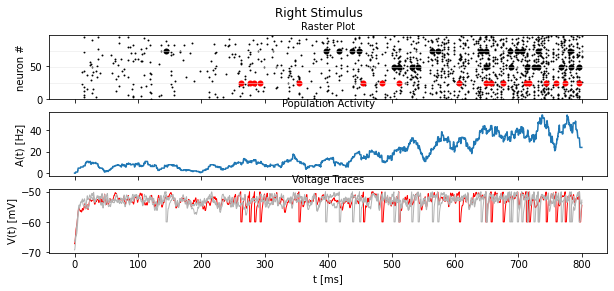

In [12]:
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right Stimulus")

INFO       width adjusted from 0.5 ms to 0.55 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

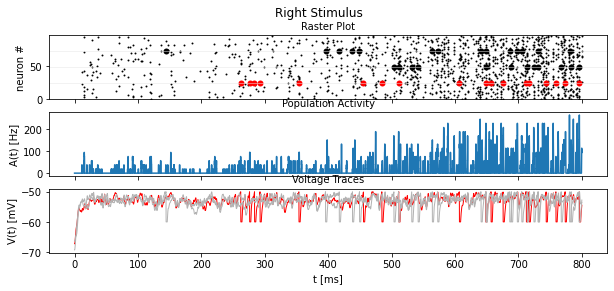

In [13]:
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=0.5 * b2.ms,
                                 sup_title="Right Stimulus")

Q12.1.2.3 Interpret the effect of a very short and a very long averaging window. \
The result becomes smoother as I increase avg_window_width. When I decrease it, the output more closely resembles the raw firing rate.

Q12.1.2.4 Find a value avg_window_width for which the population activity plot gives meaningful rates.

(<Figure size 720x288 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

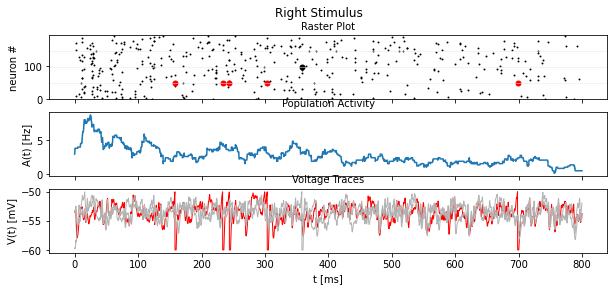

In [19]:
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=30 * b2.ms,
                                 sup_title="Right Stimulus")

We can see that as the averaging window increases, the activity of the excitatory population without stimulation indeed decreases.

### 12.2.1. Question: Coherence Level

The input stimulus is implemented by two inhomogeneous Poisson processes.  
The "Left" and "Right" subpopulations receive input from two different PoissonGroups.

Every 30 ms, the firing rates $v_{left}$ and $v_{right}$ are drawn from a normal distribution:

- $v_{left}$ ~ $N(\mu_{left}, σ²)$
- $v_{right}$ ~ $N(\mu_{right}, σ²)$

Where:

- $\mu_{left}  = \mu_0 * (0.5 + 0.5 * c)$
- $\mu_{right} = \mu_0 * (0.5 - 0.5 * c)$
- `c ∈ [-1, +1]` (coherence level)

The parameters `c` (coherence level), $\mu{0}$ (maximum mean firing rate), and `σ` (standard deviation) are part of the `sim_decision_making_network()` function.

Q12.2.1.1 From the equation above, express the difference $\mu_{𝑙𝑒𝑓𝑡}−\mu_{𝑟𝑖𝑔ℎ𝑡}$  in terms of $\mu_0$ and 𝑐. \
Answer: $\mu_{𝑙𝑒𝑓𝑡}−\mu_{𝑟𝑖𝑔ℎ𝑡}$  = $\mu_0c$

Q12.2.1.2 Find the distribution of the difference $𝜈_{𝑙𝑒𝑓𝑡}−𝜈_{𝑟𝑖𝑔ℎ𝑡}$.  \
The sum of two gaussian random variables: $$N(\mu_{left} + \mu_{right}, \sigma_{left}^2 + \sigma_{right}^2)$$

Q12.2.1.3 What are the mean firing rates $𝜇_{𝑙𝑒𝑓𝑡}$ and $𝜇_{𝑟𝑖𝑔ℎ𝑡}$  (in Hz) for the coherence level 𝑐=−0.2? \
$\mu_{𝑙𝑒𝑓𝑡} = 0.4\mu_0$ and $\mu_{right}=0.6\mu_o$

Q12.2.1.4 For 𝑐=−0.2, how does the difference 𝜇𝑙𝑒𝑓𝑡−𝜇𝑟𝑖𝑔ℎ𝑡 compare to the variance of 𝜈𝑙𝑒𝑓𝑡−𝜈𝑟𝑖𝑔ℎ𝑡. \
$\mu_{𝑙𝑒𝑓𝑡}−\mu_{𝑟𝑖𝑔ℎ𝑡} = -0.2\mu_0$  and variance = $2\sigma^2$. It isn't affected (honestly don't fully grasp the question)

### 12.2.2. Question: Input stimuli with different coherence levels
Run a few simulations with c=-0.1 and c=+0.6. Plot the network activity.

simulating 480 neurons. Start: Thu Jun  5 20:18:34 2025
sim end: Thu Jun  5 20:19:28 2025


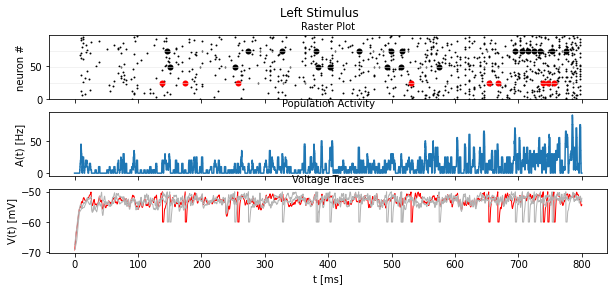

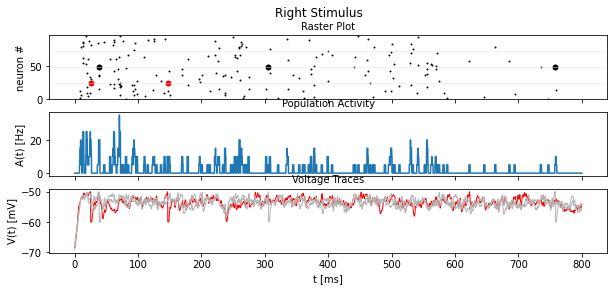

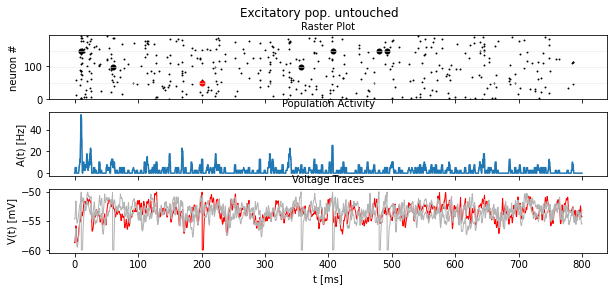

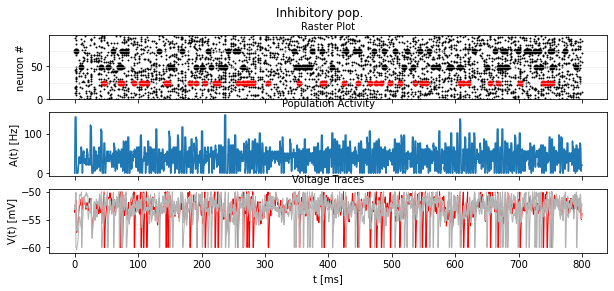

In [28]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.1, max_sim_time=800. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Excitatory pop. untouched")
plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Inhibitory pop.")
plt.show()

simulating 480 neurons. Start: Thu Jun  5 21:09:13 2025
sim end: Thu Jun  5 21:10:12 2025


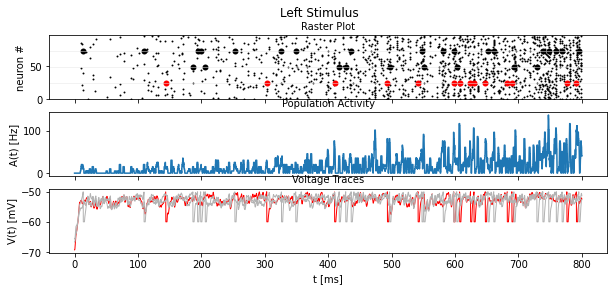

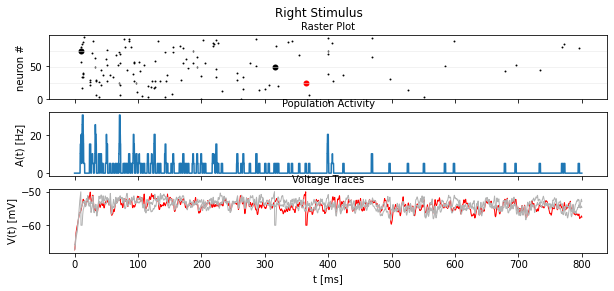

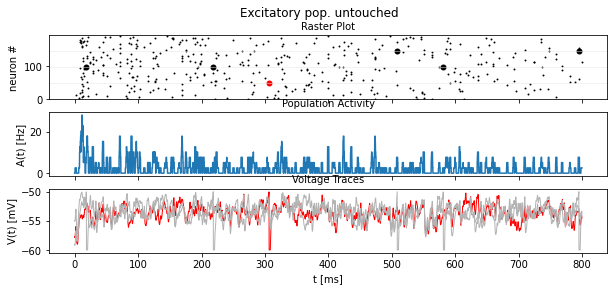

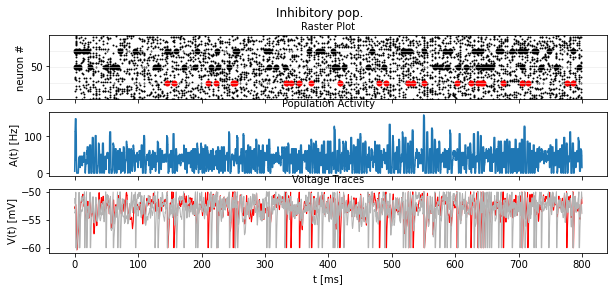

In [70]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=0.6, max_sim_time=800. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Excitatory pop. untouched")
plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Inhibitory pop.")
plt.show()

Q12.2.2.1 Does the network always make the correct decision? \
Answer: When the stimulus is weak, the network is uncertain and may even make incorrect decisions.

Q12.2.2.2 Look at the population rates and estimate how long it takes the network to make a decision. \
Answer: For a stronger stimulus, the network typically reaches a decision within 500 ms. However, as mentioned above, with weaker stimuli the network sometimes fails to make a clear choice.

### 12.3.1. Question: Plotting the Decision Space
We can visualize the dynamics of the decision making process by plotting the activities of the two subpopulations “Left” / “Right” in a phase plane (see figure at the top of this page). Such a phase plane of competing states is also known as the Decision Space. A discussion of the decision making process in the decision space is out of the scope of this exercise but we refer to References [1].

Q12.3.1.1 Write a function that takes two RateMonitors and plots the Decision Space. \
Q12.3.1.2 Add a parameter avg_window_width to your function (same semantics as in the exercise above). Run a few simulations and plot the phase plane for different values of avg_window_width. \

In [81]:
# Answer
def dec_space(rmonitorA, rmonitorB, window_width, thr):
    rate_A = rmonitorA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    rate_B = rmonitorB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    
    if np.any(rate_A > thr):
        print('Left wins')
    elif np.any(rate_B > thr):
        print('Right wins')
    else:
        print('No decision')
        
    plt.plot(rate_A, rate_B)

simulating 480 neurons. Start: Thu Jun  5 21:25:21 2025
sim end: Thu Jun  5 21:26:20 2025
Left wins


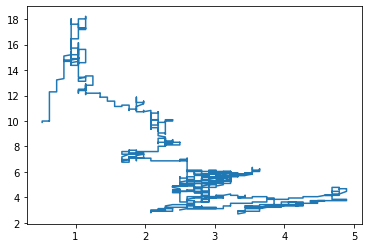

In [85]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.2, max_sim_time=800. * b2.ms)


dec_space(results["rate_monitor_A"], results["rate_monitor_B"], 100*b2.ms, 10)

Q12.3.1.3 We can use a rate threshold as a decision criterion: We say the network has made a decision if one of the (smoothed) rates crosses a threshold. What are appropriate values for avg_window_width and rate threshold to detect a decision from the two rates? 

Answer: "I ran a few experiments and chose a 100 ms averaging window, as it provides sufficient smoothing while remaining shorter than the total simulation time. For the decision threshold, I selected a firing rate of 12 Hz for the excitatory populations. I believe this is a reasonable threshold—high enough to allow the chosen population to continue growing and to suppress the competing one.

### 12.3.2. Question: Implementing a decision criterion
Using your insights from the previous questions, implement a function get_decision_time that takes two RateMonitors , a avg_window_width and a rate_threshold. The function should return a tuple (decision_time_left, decision_time_right). The decision time is the time index when some decision boundary is crossed. Possible return values are (1234.5ms, 0ms) for decision “Left”, (0ms, 987.6ms) for decision “Right” and (0ms, 0ms) for the case when no decision is made within the simulation time. A return value like (123ms, 456ms) is an error and occurs if your function is called with inappropriate values for avg_window_width and rate_threshold.


In [121]:
# Answer
def get_decision_time(rmonitorA, rmonitorB, avg_window_width, rate_threshold):
    rate_A = rmonitorA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    rate_B = rmonitorB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    
    idx_A = np.argmax(rate_A > rate_threshold/b2.Hz)
    idx_B = np.argmax(rate_B > rate_threshold/b2.Hz)
    
    return (rmonitorA.t[idx_A], rmonitorB.t[idx_B])

In [119]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=0, max_sim_time=800. * b2.ms)


get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], 100*b2.ms, 10*b2.Hz)

simulating 480 neurons. Start: Fri Jun  6 12:14:03 2025
sim end: Fri Jun  6 12:14:52 2025


(0.5764 * second, 0. * second)

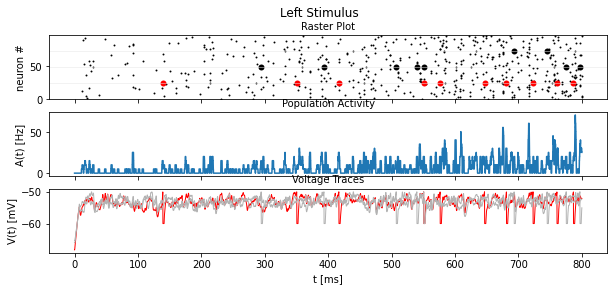

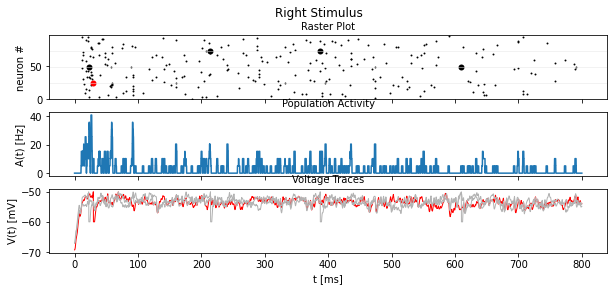

In [120]:
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left Stimulus")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right Stimulus")
plt.show()

As we see the answer is right

### 12.4.1. Question: Running multiple simulations
We now investigate how the coherence level influences the decision making process. In order to estimate quantities like Percent-correct or Decision-time, we have to average over multiple repetitions. 

Use the function competing_populations.decision_making.run_multiple_simulations() to get the values for multiple runs.

See the doc of run_multiple_simulations() to understand the parameters and return values.

Write a function that takes coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No and writes Percent correct (for each level in coherence_levels) to the terminal.

Think about other values you could get from the data. Add them to your function.


In [130]:
coherence_levels = [-0.1, -0.5]  # for negative values, B is the correct decision.
nr_repetitions = 3

time_to_A, time_to_B, count_A, count_B, count_No = decision_making.run_multiple_simulations(get_decision_time,coherence_levels, 
                                                                                            nr_repetitions, max_sim_time=800*b2.ms, 
                                                                                            rate_threshold=12*b2.Hz, avg_window_width=100*b2.ms)

********************************************
coherence_level=-0.1
i_run=0
simulating 480 neurons. Start: Fri Jun  6 12:31:42 2025
sim end: Fri Jun  6 12:32:11 2025
t_A=0. s, t_B=182.65 ms
decision: B
i_run=1
simulating 480 neurons. Start: Fri Jun  6 12:32:11 2025
sim end: Fri Jun  6 12:33:16 2025
t_A=0. s, t_B=0. s
no decision
i_run=2
simulating 480 neurons. Start: Fri Jun  6 12:33:16 2025
sim end: Fri Jun  6 12:33:54 2025
t_A=255.3 ms, t_B=0. s
decision: A
********************************************
coherence_level=-0.5
i_run=0
simulating 480 neurons. Start: Fri Jun  6 12:33:54 2025
sim end: Fri Jun  6 12:34:58 2025
t_A=0. s, t_B=0.65335 s
decision: B
i_run=1
simulating 480 neurons. Start: Fri Jun  6 12:34:58 2025
sim end: Fri Jun  6 12:35:19 2025
t_A=214.1 ms, t_B=0. s
decision: A
i_run=2
simulating 480 neurons. Start: Fri Jun  6 12:35:19 2025
sim end: Fri Jun  6 12:35:40 2025
t_A=0. s, t_B=220.35 ms
decision: B


In [139]:
# Answer
def correctness(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No):
    for i, l in enumerate(coherence_levels):
        if l > 0:
            choice = ((count_A[i]/len(time_to_A[i]))*100)
        else: 
            choice = ((count_B[i]/len(time_to_B[i]))*100)
        print(f'For coherence level {l} correctness {choice:.2f}% within {len(time_to_A[i])} trails')

In [140]:
correctness(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No)

For coherence level -0.1 correctness 33.33% within 3 trails
For coherence level -0.5 correctness 66.67% within 3 trails


### 12.4.2. Question: Percent-Correct, Time-to-decision
Using run_multiple_simulations(), run at least 20 simulations for each of the two coherence_levels = [+0.15, -0.8] and visualize the results. Warning: Depending on your computer, this simulation could run for more than an hour.

Q12.4.2.1 Visualize Percent correct versus coherence level. Count simulations with “no decision” as wrong.

Q12.4.2.2 Visualize Time to decision versus coherence level. Ignore simulations with “no decision”.

In [141]:
coherence_levels = [0.15, -0.8]
nr_repetitions = 20

time_to_A, time_to_B, count_A, count_B, count_No = decision_making.run_multiple_simulations(get_decision_time, coherence_levels, nr_repetitions, max_sim_time=1200 * b2.ms)

********************************************
coherence_level=0.15
i_run=0
simulating 480 neurons. Start: Fri Jun  6 12:39:33 2025
sim end: Fri Jun  6 12:40:45 2025
t_A=0.5825 s, t_B=0. s
decision: A
i_run=1
simulating 480 neurons. Start: Fri Jun  6 12:40:45 2025
sim end: Fri Jun  6 12:42:00 2025
t_A=0.89845 s, t_B=0. s
decision: A
i_run=2
simulating 480 neurons. Start: Fri Jun  6 12:42:00 2025
sim end: Fri Jun  6 12:42:58 2025
t_A=0. s, t_B=0.6709 s
decision: B
i_run=3
simulating 480 neurons. Start: Fri Jun  6 12:42:58 2025
sim end: Fri Jun  6 12:43:45 2025
t_A=0.54705 s, t_B=0. s
decision: A
i_run=4
simulating 480 neurons. Start: Fri Jun  6 12:43:45 2025
sim end: Fri Jun  6 12:44:49 2025
t_A=0. s, t_B=0.65285 s
decision: B
i_run=5
simulating 480 neurons. Start: Fri Jun  6 12:44:49 2025
sim end: Fri Jun  6 12:46:15 2025
t_A=1.1669 s, t_B=0. s
decision: A
i_run=6
simulating 480 neurons. Start: Fri Jun  6 12:46:15 2025
sim end: Fri Jun  6 12:47:40 2025
t_A=0. s, t_B=0. s
no decision
i_ru

In [142]:
# Answer
correctness(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No)

For coherence level 0.15 correctness 60.00% within 20 trails
For coherence level -0.8 correctness 90.00% within 20 trails


In [163]:
# Answer
for i, l in enumerate(coherence_levels):
    ts = (time_to_A + time_to_B)[i]
    av_time = np.sum(ts)/np.sum(ts != 0)
    print(f'For coherence level {l} average time decision: {av_time:.3f}')


For coherence level 0.15 average time decision: 0.688
For coherence level -0.8 average time decision: 0.567


Q12.4.2.3 Discuss your results. 

Answer: For higher coherence level the correctness of responces are higher whereas decision time is lower